In [1]:
import json
import os
import glob
import pprint
from tqdm import tqdm
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/verified.dat", 
                 names=["uid", "name", "friends", "friends_count", 
                        "followers_count", "listed_count", "statuses_count", 
                        "created_at", "url", "avatar", "location"])

In [3]:
# df = df[df['friends_count'] <= 1000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335018 entries, 0 to 335017
Data columns (total 11 columns):
uid                335018 non-null int64
name               335017 non-null object
friends            335018 non-null object
friends_count      335018 non-null int64
followers_count    335018 non-null int64
listed_count       335018 non-null int64
statuses_count     335018 non-null int64
created_at         335018 non-null object
url                269170 non-null object
avatar             332540 non-null object
location           269760 non-null object
dtypes: int64(5), object(6)
memory usage: 28.1+ MB


In [4]:
df.head()

,uid,name,friends,friends_count,followers_count,listed_count,statuses_count,created_at,url,avatar,location
0,26642006,Alyssa_Milano,friends,4381,3638372,37370,59701,Thu Mar 26 00:34:20 +0000 2009,https://t.co/DOhhBYiEHZ,img/26642006.jpg,Los Angeles
1,46233559,rosemcgowan,friends,4661,890406,8280,13880,Wed Jun 10 21:39:32 +0000 2009,https://t.co/hinkEjQ5ex,img/46233559.jpg,Planet 9
2,44783853,HHSGov,friends,396,779017,8545,19885,Fri Jun 05 01:14:31 +0000 2009,https://t.co/T4j355Evo7,img/44783853.jpg,Washington D.C.
3,44409004,shakira,friends,210,51523187,99436,6301,Wed Jun 03 17:38:07 +0000 2009,https://t.co/lL3bUtNcA1,NaN,Barranquilla
4,62290422,RedHourBen,friends,625,5763578,28830,5484,Sun Aug 02 16:21:43 +0000 2009,NaN,img/62290422.jpg,Red Hour Films - Los Angeles


In [5]:
# df.info()

### Dict structure    
uid:{
    
    uid: 123,
    name: '',
    friends_count: 0,
    followers_count: 0,
    listed_count: 0,
    statuses_count: 0,
    pff: 0,
    pfr: 0,
    gcf: 0,
    gcr: 0,
    description: '',
    tweets: []

}

In [6]:
ids = list(df['uid'])


In [7]:
users = {}

# for i in ids:
    
#     users[i] = {
#         'uid': i,
#         'pff': 0,
#         'pfr': 0,
#         'gcf': 0,
#         'gcr': 0,
#         'description': '',
#         'tweets': []
#     }

In [8]:
# len(users)

In [9]:
# users = users

In [ ]:
files_users = glob.iglob(f"../fakenewsnet_dataset/user_profiles/*.json")

count = 0


for file in files_users:
    if count%1000 == 0:
        print(count)
#     if count == 1:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
#         print(data)
        
        if data['verified'] == False:
            users[data['id']] = {
                'uid': data['id'],
                'name': data['screen_name'],
                'friends': 'friends',
                'friends_count': data['friends_count'],
                'followers_count': data['followers_count'],
                'listed_count': data['listed_count'],
                'statuses_count': data['statuses_count'],
                'created_at': data['created_at'],
                'url': data['url'],
                'avatar': data['profile_image_url_https'],
                'location': data['location'],
                'pff': 0,
                'pfr': 0,
                'gcf': 0,
                'gcr': 0,
                'description': data['description'],
                'tweets': []
            }
    
    count+=1
            

In [13]:
len(users)

388134

In [14]:
list_of_lists = []

for user_id in users:
    name = users[user_id]['name']
    friends_count = users[user_id]['friends_count']
    followers_count = users[user_id]['followers_count']
    listed_count = users[user_id]['listed_count']
    statuses_count = users[user_id]['statuses_count']
    friends = users[user_id]['friends']
    created_at = users[user_id]['created_at']
    location = users[user_id]['location']
    avatar = users[user_id]['avatar']
    url = users[user_id]['url']
    
    
    list_of_lists.append([user_id, name, friends, friends_count, 
                        followers_count, listed_count, statuses_count, 
                        created_at, url, avatar, location])


In [15]:
df_users = pd.DataFrame(list_of_lists, columns=["uid", "name", "friends", "friends_count", 
                                                "followers_count", "listed_count", "statuses_count", 
                                                "created_at", "url", "avatar", "location"])

In [16]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388134 entries, 0 to 388133
Data columns (total 11 columns):
uid                388134 non-null int64
name               388134 non-null object
friends            388134 non-null object
friends_count      388134 non-null int64
followers_count    388134 non-null int64
listed_count       388134 non-null int64
statuses_count     388134 non-null int64
created_at         388134 non-null object
url                152557 non-null object
avatar             388134 non-null object
location           388134 non-null object
dtypes: int64(5), object(6)
memory usage: 32.6+ MB


In [17]:
df_users.sort_values(['followers_count', 'friends_count'], ascending=False).head(10)

,uid,name,friends,friends_count,followers_count,listed_count,statuses_count,created_at,url,avatar,location
6636,204832963,God,friends,1,6037977,16876,10663,Tue Oct 19 15:26:05 +0000 2010,None,https://pbs.twimg.com/profile_images/113860394...,
302038,443580317,unsent,friends,56,2422670,1543,82364,Thu Dec 22 09:46:57 +0000 2011,https://t.co/WAenzXbnXS,https://pbs.twimg.com/profile_images/116193534...,
373056,2425231,Fact,friends,1,2158118,7809,652719,Tue Mar 27 07:29:54 +0000 2007,https://t.co/UxeihmioT9,https://pbs.twimg.com/profile_images/296988112...,
22075,14116807,ShareThis,friends,4318,2148099,4442,5628,Mon Mar 10 19:46:37 +0000 2008,https://t.co/6tkMndB2Nc,https://pbs.twimg.com/profile_images/115663896...,"Palo Alto, CA"
118746,2507863381,Khawaja Saad Rafique,friends,42,2012310,385,4750,Mon May 19 16:27:26 +0000 2014,https://t.co/837s98JC83,https://pbs.twimg.com/profile_images/117678544...,Lahore. Pakistan
321040,69356087,Hadith of the Day,friends,705,1983058,1424,27162,Thu Aug 27 17:52:09 +0000 2009,https://t.co/d5YprVJqPX,https://pbs.twimg.com/profile_images/378800000...,UK
232215,27528339,Linda Ikeji,friends,1069,1943897,1715,156397,Sun Mar 29 23:14:08 +0000 2009,https://t.co/xeA40RNwQA,https://pbs.twimg.com/profile_images/116311787...,Lagos
40627,9075022,RPP Noticias,friends,949,1828232,4832,378021,Mon Sep 24 18:45:40 +0000 2007,https://t.co/qd1Hy59Hqa,https://pbs.twimg.com/profile_images/105373613...,"Lima, Peru"
57368,835083097,Puppy Lover,friends,11923,1750967,1130,104963,Thu Sep 20 08:23:18 +0000 2012,https://t.co/Pyjp2clSrY,https://pbs.twimg.com/profile_images/421624037...,
323847,279390084,Anonymous,friends,898,1541142,15920,173689,Sat Apr 09 05:10:37 +0000 2011,None,https://pbs.twimg.com/profile_images/108012925...,The Interwebs


In [18]:
# df_users.to_csv('datasets/unverified_users_list.csv', index=False)

## PolitiFact

### Fake Tweets & Retweets

In [10]:
files = glob.iglob(f"../fakenewsnet_dataset/politifact/fake/*/tweets/*.json")

count = 0

#143000

for file in files:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        use = data['user']
        
        if not use['verified']:
            if user_id in users:
                users[user_id]['pff']+=1
                users[user_id]['description'] = des
                users[user_id]['tweets'].append(tweet)
            else:
                users[user_id] = {
                    'uid': use['id'],
                    'name': use['screen_name'],
                    'friends': 'friends',
                    'friends_count': use['friends_count'],
                    'followers_count': use['followers_count'],
                    'listed_count': use['listed_count'],
                    'statuses_count': use['statuses_count'],
                    'created_at': use['created_at'],
                    'url': use['url'],
                    'avatar': use['profile_image_url_https'],
                    'location': use['location'],
                    'pff': 1,
                    'pfr': 0,
                    'gcf': 0,
                    'gcr': 0,
                    'description': use['description'],
                    'tweets': [tweet]
                }
    count +=1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000


In [11]:
files_rt = glob.iglob(f"../fakenewsnet_dataset/politifact/fake/*/retweets/*.json")

count = 0
# 27000

for file in files_rt:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']
            use = d['user']
            
            if not use['verified']:
            
                if user_id in users:
                    users[user_id]['pff']+=1
                    users[user_id]['description'] = des
                    users[user_id]['tweets'].append(tweet)
                else:
                    users[user_id] = {
                        'uid': use['id'],
                        'name': use['screen_name'],
                        'friends': 'friends',
                        'friends_count': use['friends_count'],
                        'followers_count': use['followers_count'],
                        'listed_count': use['listed_count'],
                        'statuses_count': use['statuses_count'],
                        'created_at': use['created_at'],
                        'url': use['url'],
                        'avatar': use['profile_image_url_https'],
                        'location': use['location'],
                        'pff': 1,
                        'pfr': 0,
                        'gcf': 0,
                        'gcr': 0,
                        'description': use['description'],
                        'tweets': [tweet]
                    }
                
    count +=1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


In [12]:
# len(users)

### Real Tweets & Retweets

In [13]:
files = glob.iglob(f"../fakenewsnet_dataset/politifact/real/*/tweets/*.json")

#362000

count = 0
for file in files:
    if count%1000 == 0:
        print(count)
    count +=1
#     if count < 240001:
#         continue
#     if count == 500000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        use = data['user']
        
        if not use['verified']:
            if user_id in users:
                users[user_id]['pfr']+=1
                users[user_id]['description'] = des
                users[user_id]['tweets'].append(tweet)
            else:
                users[user_id] = {
                    'uid': use['id'],
                    'name': use['screen_name'],
                    'friends': 'friends',
                    'friends_count': use['friends_count'],
                    'followers_count': use['followers_count'],
                    'listed_count': use['listed_count'],
                    'statuses_count': use['statuses_count'],
                    'created_at': use['created_at'],
                    'url': use['url'],
                    'avatar': use['profile_image_url_https'],
                    'location': use['location'],
                    'pff': 0,
                    'pfr': 1,
                    'gcf': 0,
                    'gcr': 0,
                    'description': use['description'],
                    'tweets': [tweet]
                }
        
#         userList.append(data['user'])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [14]:
files_rt = glob.iglob(f"../fakenewsnet_dataset/politifact/real/*/retweets/*.json")

count = 0


for file in files_rt:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']
            use = d['user']
            
            if not use['verified']:
            
                if user_id in users:
                    users[user_id]['pfr']+=1
                    users[user_id]['description'] = des
                    users[user_id]['tweets'].append(tweet)
                else:
                    users[user_id] = {
                        'uid': use['id'],
                        'name': use['screen_name'],
                        'friends': 'friends',
                        'friends_count': use['friends_count'],
                        'followers_count': use['followers_count'],
                        'listed_count': use['listed_count'],
                        'statuses_count': use['statuses_count'],
                        'created_at': use['created_at'],
                        'url': use['url'],
                        'avatar': use['profile_image_url_https'],
                        'location': use['location'],
                        'pff': 0,
                        'pfr': 1,
                        'gcf': 0,
                        'gcr': 0,
                        'description': use['description'],
                        'tweets': [tweet]
                    }
    count +=1

## GossipCop

### Fake Tweets & Retweets

In [15]:
files = glob.iglob(f"../fakenewsnet_dataset/gossipcop/fake/*/tweets/*.json")

count = 0
#524000

for file in files:
    if count%1000 == 0:
        print(count)
    count +=1
#     if count < 240001:
#         continue
#     if count == 500000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        use = data['user']
        
        if not use['verified']:
            if user_id in users:
                users[user_id]['gcf']+=1
                users[user_id]['description'] = des
                users[user_id]['tweets'].append(tweet)
            else:
                users[user_id] = {
                    'uid': use['id'],
                    'name': use['screen_name'],
                    'friends': 'friends',
                    'friends_count': use['friends_count'],
                    'followers_count': use['followers_count'],
                    'listed_count': use['listed_count'],
                    'statuses_count': use['statuses_count'],
                    'created_at': use['created_at'],
                    'url': use['url'],
                    'avatar': use['profile_image_url_https'],
                    'location': use['location'],
                    'pff': 0,
                    'pfr': 0,
                    'gcf': 1,
                    'gcr': 0,
                    'description': use['description'],
                    'tweets': [tweet]
                }
        
#         userList.append(data['user'])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [16]:
files_rt = glob.iglob(f"../fakenewsnet_dataset/gossipcop/fake/*/retweets/*.json")

count = 0
# 57000

for file in files_rt:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']
            use = d['user']
            
            if not use['verified']:
            
                if user_id in users:
                    users[user_id]['gcf']+=1
                    users[user_id]['description'] = des
                    users[user_id]['tweets'].append(tweet)
                else:
                    users[user_id] = {
                        'uid': use['id'],
                        'name': use['screen_name'],
                        'friends': 'friends',
                        'friends_count': use['friends_count'],
                        'followers_count': use['followers_count'],
                        'listed_count': use['listed_count'],
                        'statuses_count': use['statuses_count'],
                        'created_at': use['created_at'],
                        'url': use['url'],
                        'avatar': use['profile_image_url_https'],
                        'location': use['location'],
                        'pff': 0,
                        'pfr': 0,
                        'gcf': 1,
                        'gcr': 0,
                        'description': use['description'],
                        'tweets': [tweet]
                    }
    count +=1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000


In [17]:
# users

### Real Tweets & Retweets

In [18]:
files = glob.iglob(f"../fakenewsnet_dataset/gossipcop/real/*/tweets/*.json")

# 815000
count = 0
for file in files:
    if count%1000 == 0:
        print(count)
    count +=1
#     if count < 240001:
#         continue
    if count == 1000000:
        break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        use = data['user']
        
        if not use['verified']:
            if user_id in users:
                users[user_id]['gcr']+=1
                users[user_id]['description'] = des
                users[user_id]['tweets'].append(tweet)
            else:
                users[user_id] = {
                    'uid': use['id'],
                    'name': use['screen_name'],
                    'friends': 'friends',
                    'friends_count': use['friends_count'],
                    'followers_count': use['followers_count'],
                    'listed_count': use['listed_count'],
                    'statuses_count': use['statuses_count'],
                    'created_at': use['created_at'],
                    'url': use['url'],
                    'avatar': use['profile_image_url_https'],
                    'location': use['location'],
                    'pff': 0,
                    'pfr': 0,
                    'gcf': 0,
                    'gcr': 1,
                    'description': use['description'],
                    'tweets': [tweet]
                }
            
        
#         userList.append(data['user'])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


## Create Dataset

In [19]:
# users

In [20]:
# df_tw = pd.DataFrame(columns=["uid", 'pff','pfr','gcf','gcr', 'description', 'tweets'])

In [21]:
list_of_lists = []

for user_id in users:
    name = users[user_id]['name']
    friends_count = users[user_id]['friends_count']
    followers_count = users[user_id]['followers_count']
    listed_count = users[user_id]['listed_count']
    statuses_count = users[user_id]['statuses_count']
    friends = users[user_id]['friends']
    created_at = users[user_id]['created_at']
    location = users[user_id]['location']
    avatar = users[user_id]['avatar']
    url = users[user_id]['url']
    gcf = users[user_id]['gcf']
    gcr = users[user_id]['gcr']
    pff = users[user_id]['pff']
    pfr = users[user_id]['pfr']
    des = users[user_id]['description']
    tweets = "^".join(users[user_id]['tweets'])
    
    list_of_lists.append([user_id, name, friends_count, followers_count, listed_count, statuses_count
                          , pff, pfr, gcf, gcr, des, tweets, friends , 
                        created_at, url, avatar, location])


In [22]:
df_tw = pd.DataFrame(list_of_lists, columns=["uid", 'name','friends_count','followers_count'
                                                ,'listed_count', 'statuses_count', 
                                             'pff','pfr','gcf','gcr', 'description', 'tweets',
                                            'friends', 'created_at', 'url', 'avatar', 'location'])

In [23]:
df_tw.head()

,uid,name,friends_count,followers_count,listed_count,statuses_count,pff,pfr,gcf,gcr,description,tweets,friends,created_at,url,avatar,location
0,1434771787,FedUpwDemsLIES,2397,3194,49,218315,1,0,1,0,"Conservative, fed up with politics as usual",BREAKING: Fox Star Tucker Carlson In Critical ...,friends,Fri May 17 05:17:08 +0000 2013,None,https://pbs.twimg.com/profile_images/117660937...,
1,83841942,elgomes15,4980,3689,53,192200,4,0,0,0,Love people love to https://t.co/MSFy4ENzYp mo...,BREAKING: Fox Star Tucker Carlson In Critical ...,friends,Tue Oct 20 13:19:00 +0000 2009,None,https://abs.twimg.com/sticky/default_profile_i...,Bakersfield ca
2,1126785380,trapshooter711,698,465,84,31991,5,4,0,1,cancer fund,BREAKING: Fox Star Tucker Carlson In Critical ...,friends,Mon Jan 28 02:21:28 +0000 2013,None,https://pbs.twimg.com/profile_images/584864278...,
3,2273244103,Tombo2014,75,41,1,17656,6,1,0,0,Living the dream,Fox Star Tucker Carlson in Critical Condition ...,friends,Thu Jan 02 16:23:03 +0000 2014,None,https://pbs.twimg.com/profile_images/420292438...,Ohio
4,555815209,vic_tracy,886,585,7,49127,2,2,1,0,"Traveling and Experiencing Life, Gay\nNo regre...",BREAKING: suspected act of violence Fox Star T...,friends,Tue Apr 17 09:05:16 +0000 2012,None,https://pbs.twimg.com/profile_images/214257020...,


In [24]:
# df.drop(['friends', 'created_at', 'url', 'avatar', 'location'], axis=1, inplace=True)

In [25]:
# df.info()

In [26]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559317 entries, 0 to 559316
Data columns (total 17 columns):
uid                559317 non-null int64
name               559317 non-null object
friends_count      559317 non-null int64
followers_count    559317 non-null int64
listed_count       559317 non-null int64
statuses_count     559317 non-null int64
pff                559317 non-null int64
pfr                559317 non-null int64
gcf                559317 non-null int64
gcr                559317 non-null int64
description        559317 non-null object
tweets             559317 non-null object
friends            559317 non-null object
created_at         559317 non-null object
url                214659 non-null object
avatar             559317 non-null object
location           559317 non-null object
dtypes: int64(9), object(8)
memory usage: 72.5+ MB


In [27]:
# df_feat = df.merge(df_tw, how='inner', on='uid')
df_feat = df_tw

In [28]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559317 entries, 0 to 559316
Data columns (total 17 columns):
uid                559317 non-null int64
name               559317 non-null object
friends_count      559317 non-null int64
followers_count    559317 non-null int64
listed_count       559317 non-null int64
statuses_count     559317 non-null int64
pff                559317 non-null int64
pfr                559317 non-null int64
gcf                559317 non-null int64
gcr                559317 non-null int64
description        559317 non-null object
tweets             559317 non-null object
friends            559317 non-null object
created_at         559317 non-null object
url                214659 non-null object
avatar             559317 non-null object
location           559317 non-null object
dtypes: int64(9), object(8)
memory usage: 72.5+ MB


In [29]:
df_feat.head()

,uid,name,friends_count,followers_count,listed_count,statuses_count,pff,pfr,gcf,gcr,description,tweets,friends,created_at,url,avatar,location
0,1434771787,FedUpwDemsLIES,2397,3194,49,218315,1,0,1,0,"Conservative, fed up with politics as usual",BREAKING: Fox Star Tucker Carlson In Critical ...,friends,Fri May 17 05:17:08 +0000 2013,None,https://pbs.twimg.com/profile_images/117660937...,
1,83841942,elgomes15,4980,3689,53,192200,4,0,0,0,Love people love to https://t.co/MSFy4ENzYp mo...,BREAKING: Fox Star Tucker Carlson In Critical ...,friends,Tue Oct 20 13:19:00 +0000 2009,None,https://abs.twimg.com/sticky/default_profile_i...,Bakersfield ca
2,1126785380,trapshooter711,698,465,84,31991,5,4,0,1,cancer fund,BREAKING: Fox Star Tucker Carlson In Critical ...,friends,Mon Jan 28 02:21:28 +0000 2013,None,https://pbs.twimg.com/profile_images/584864278...,
3,2273244103,Tombo2014,75,41,1,17656,6,1,0,0,Living the dream,Fox Star Tucker Carlson in Critical Condition ...,friends,Thu Jan 02 16:23:03 +0000 2014,None,https://pbs.twimg.com/profile_images/420292438...,Ohio
4,555815209,vic_tracy,886,585,7,49127,2,2,1,0,"Traveling and Experiencing Life, Gay\nNo regre...",BREAKING: suspected act of violence Fox Star T...,friends,Tue Apr 17 09:05:16 +0000 2012,None,https://pbs.twimg.com/profile_images/214257020...,


In [30]:
df_feat['total_fake'] = df_feat['pff'] + df_feat['gcf']
df_feat['total_real'] = df_feat['pfr'] + df_feat['gcr']

df_feat['net_trust'] = df_feat['total_real'] - df_feat['total_fake']

df_feat['total_news'] = df_feat['total_real'] + df_feat['total_fake']
df_feat['fake_prob'] = df_feat['total_fake'] / df_feat['total_news']

df_feat['net_trust_norm'] = df_feat['net_trust']/df_feat['total_news']

In [31]:
df_feat['fake'] = [1 if x >= 0.5 else 0 if x < 0.5 else 2 for x in df_feat['fake_prob']]

In [32]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559317 entries, 0 to 559316
Data columns (total 24 columns):
uid                559317 non-null int64
name               559317 non-null object
friends_count      559317 non-null int64
followers_count    559317 non-null int64
listed_count       559317 non-null int64
statuses_count     559317 non-null int64
pff                559317 non-null int64
pfr                559317 non-null int64
gcf                559317 non-null int64
gcr                559317 non-null int64
description        559317 non-null object
tweets             559317 non-null object
friends            559317 non-null object
created_at         559317 non-null object
url                214659 non-null object
avatar             559317 non-null object
location           559317 non-null object
total_fake         559317 non-null int64
total_real         559317 non-null int64
net_trust          559317 non-null int64
total_news         559317 non-null int64
fake_prob          5

In [33]:
df_feat.to_csv('datasets/unverified_features_500k.csv', index=False)

In [34]:
# df_feat = pd.read_csv("datasets/verified_features_300k.csv")

In [35]:
df_final = df_feat[
     (df_feat['name'] != 'GossipCop') & (df_feat['name'] != 'PolitiFact')
#      & (df_feat['net_trust_norm'] != 0)
     & (df_feat['friends_count'] <= 10000)
     & (df_feat['followers_count'] >= 1000)
     & (df_feat['total_fake'] > 2)
     & (df_feat['total_real'] > 2)


    ].sort_values(['followers_count', 'total_news', 'net_trust_norm', 
                   'net_trust', 'followers_count'], ascending=False)

In [36]:
df_final

,uid,name,friends_count,followers_count,listed_count,statuses_count,pff,pfr,gcf,gcr,...,url,avatar,location,total_fake,total_real,net_trust,total_news,fake_prob,net_trust_norm,fake
64448,14669951,DRUDGE_REPORT,2,1378378,21171,237720,1,3,2,2,...,http://t.co/dsLXEBfDsQ,https://pbs.twimg.com/profile_images/53808884/...,US,3,5,2,8,0.375000,0.250000,0
206323,1754641,nytimesbusiness,441,786324,14641,206786,0,3,4,4,...,http://t.co/OKrfdBy4ch,https://pbs.twimg.com/profile_images/963826250...,"New York, NY",4,7,3,11,0.363636,0.272727,0
220581,3863605355,historylvrsclub,0,544773,5041,252317,0,6,96,0,...,https://t.co/gggmdpuCSK,https://pbs.twimg.com/profile_images/111175905...,"London, England",96,6,-90,102,0.941176,-0.882353,1
336833,53036660,GLAMOUR_sa,862,500682,355,36609,0,0,7,5,...,https://t.co/3WA7d5ciQJ,https://pbs.twimg.com/profile_images/103042295...,South Africa,7,5,-2,12,0.583333,-0.166667,1
304615,270106571,brotips,58,464707,1504,87848,0,0,9,4,...,http://t.co/OzQz9pP0OI,https://pbs.twimg.com/profile_images/197154534...,"Los Angeles, CA",9,4,-5,13,0.692308,-0.384615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41230,1303136983,IFollowYooBack_,1662,1003,137,346731,1,50,25,29,...,http://t.co/kDBj1hDbNU,https://pbs.twimg.com/profile_images/106920238...,"Kent, United Kingdom",26,79,53,105,0.247619,0.504762,0
292481,2894608378,jenilopez_fans,1587,1003,6,5730,0,0,41,23,...,http://t.co/g6etISoh73,https://pbs.twimg.com/profile_images/537992328...,,41,23,-18,64,0.640625,-0.281250,1
289224,243264343,antonio_s_t,1867,1003,28,153858,0,0,15,9,...,None,https://pbs.twimg.com/profile_images/110015735...,"London, England",15,9,-6,24,0.625000,-0.250000,1
10596,1177878342,mw569256,445,1002,121,511267,2,7,3,1,...,https://t.co/y6bNq0gT21,https://pbs.twimg.com/profile_images/616453373...,,5,8,3,13,0.384615,0.230769,0


In [37]:
df_final['fake'] = [1 if x >= 0.5 else 0 if x < 0.5 else 2 for x in df_final['fake_prob']]

In [38]:
df_final.to_csv('datasets/unverified_features_4k.csv', index=False)

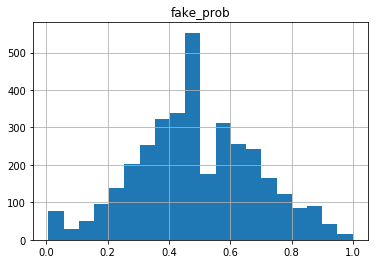

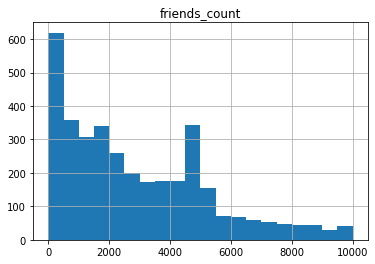

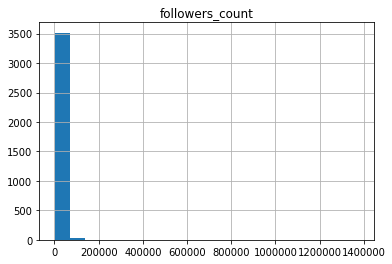

In [39]:
# df_feat.hist(column='fake_prob', bins=20)


df_final.hist(column='fake_prob', bins=20)

df_final.hist(column='friends_count', bins=20)

df_final.hist(column='followers_count', bins=20)

plt.show()

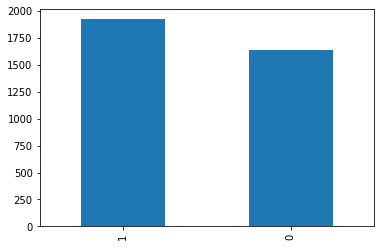

In [40]:
df_final["fake"].value_counts().plot.bar()
plt.show()

In [41]:
df_final["fake"].value_counts()

1    1922
0    1637
Name: fake, dtype: int64

In [2]:
# un = pd.read_csv("datasets/unverified.dat", 
#                  names=["uid", "name", "friends", "friends_count", 
#                         "followers_count", "listed_count", "statuses_count", 
#                         "created_at", "url", "avatar", "location"])
df = pd.read_csv("datasets/unverified_features_4k.csv")

In [3]:
un = df[["uid", "name", "friends", "friends_count", 
        "followers_count", "listed_count", "statuses_count", 
        "created_at", "url", "avatar", "location"]]

In [4]:
un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3561 entries, 0 to 3560
Data columns (total 11 columns):
uid                3561 non-null object
name               3560 non-null object
friends            3559 non-null object
friends_count      3560 non-null object
followers_count    3560 non-null object
listed_count       3560 non-null object
statuses_count     3560 non-null object
created_at         3559 non-null object
url                2173 non-null object
avatar             3558 non-null object
location           2925 non-null object
dtypes: object(11)
memory usage: 306.1+ KB


In [5]:
un = un[un['friends_count'].astype(str).str.isdigit()]

In [6]:
un.to_csv('datasets/unverified.dat', header=False, index=False)

In [46]:
# with open('datasets/unverified.gml', 'r') as file:
#     data = file.read()
#     print(data)